Human-in-the-loop Selection

In [2]:
from src.utils import * 
Paper

# Question: Can you wrap this around a front-end, or a terminal console interface ? (I think terminal console is easier here)
get_action = lambda: input("Do you like this paper? (y/n/back): ").lower()
get_reject_feedback = lambda: input("Please provide feedback for rejection: ")

def build_research_graph():
    """ 
    1. Scrape ArXiv for newest 200 AI papers 
    2. AI do ranking & analysis base on abstracts
    3. Human select 5 papers from top-ranked papers
    4. Conditional on human acceptance, proceed, otherwise, summarize human preference and go back to 2.
    -- Output 5 papers & analysis
    """
    model = ChatOpenAI(model="gpt-4o")
    builder = StateGraph(State)
    
    # Research graph part
    research_entry_point = "crawl_arxiv_node"
    builder.add_node(research_entry_point, CrawlNode(research_entry_point))
    builder.add_edge(START, research_entry_point)
    
    builder = add_selection_nodes(builder, research_entry_point, "human_approval_node", model)
    
    # Human approval graph part
    human_approval_node = "human_approval_node"
    builder.add_node(human_approval_node, HumanApprovalNode(human_approval_node,
                                                            get_action=get_action,
                                                            get_reject_feedback=get_reject_feedback))  # Assuming HumanApprovalNode is defined elsewhere
    
    # So here we ought to have a conditional edge, if there is "redo" in the message, we re-run from research_entry_point
    builder.add_conditional_edges(human_approval_node, 
                                  should_continue,
                                  {
                                    "continue": END,
                                    "redo": research_entry_point,
                                  },)
        
    return builder.compile()


In [3]:
app = build_research_graph()

# Run the graph with intermediate inference
result = app.invoke({
    "messages": [],
    "papers": []
})

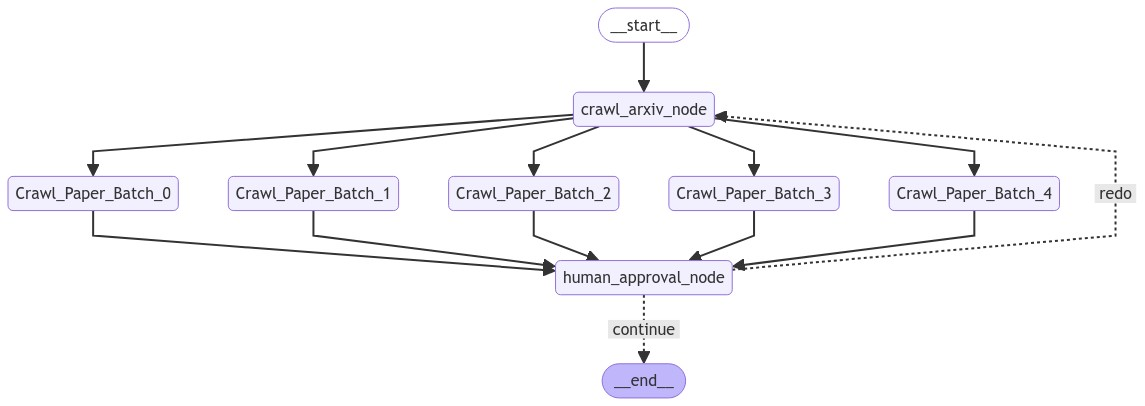

In [4]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [ ]:
# Do a streamlit 

In [9]:
result["papers"]

# Select the top papers
# Select the top papers based on score
top_papers = sorted(result["papers"], key=lambda x: x.get('score', 0), reverse=True)[:5]

print("Top 5 papers:")
for i, paper in enumerate(top_papers, 1):
    print(f"{i}. {paper['title']} (Score: {paper.get('score', 'N/A')})")
    print(f"   Comment: {paper.get('comment', 'No comment')[:100]}...")  # Truncate long comments
    print()

Top 5 papers:
1. SAM2-Adapter: Evaluating & Adapting Segment Anything 2 in Downstream Tasks: Camouflage, Shadow, Medical Image Segmentation, and More (Score: 90)
   Comment: The paper makes a significant contribution by improving the performance of SAM2 on complex segmentat...

2. Evaluating the Impact of Pulse Oximetry Bias in Machine Learning under Counterfactual Thinking (Score: 90)
   Comment: The study addresses an important issue of algorithmic bias in healthcare, specifically the bias in p...

3. Addressing Model and Data Heterogeneity in Multimodal Large Language Model Training (Score: 90)
   Comment: The MMScale framework addresses critical issues of model and data heterogeneity in multimodal large ...

4. GMAI-MMBench: A Comprehensive Multimodal Evaluation Benchmark Towards General Medical AI (Score: 90)
   Comment: GMAI-MMBench presents an extensive and structured benchmark for evaluating large vision-language mod...

5. MedTrinity-25M: A Large-scale Multimodal Dataset with 

In [5]:
content = """[
    {
        "title": "Working with Color: How Color Quantization Can Aid Researchers of Problematic Information",
        "comment": "This paper presents an interesting approach by applying geometric computer graphics methods, particularly color quantization, to analyze problematic information campaigns. The historicist trace of color quantization methods is a valuable contribution, especially in addressing bias and reclaiming methodologies from their racist origins. However, the scope is somewhat narrow as it focuses specifically on a case study at the US-Mexico border, which may limit the general applicability of the findings.",
        "score": 70
    },
    {
        "title": "The AI-Native Software Development Lifecycle: A Theoretical and Practical New Methodology",
        "comment": "The paper proposes a novel AI-native Software Development Lifecycle (SDLC) model, named the V-Bounce model, which could significantly impact how software is developed by integrating AI throughout the process. This shift could dramatically reduce implementation times and redefine human roles in software development. However, the paper is theoretical and lacks practical implementation details or case studies demonstrating the model's efficacy.",
        "score": 85
    },
    {
        "title": "Logistic Regression makes small LLMs strong and explainable 'tens-of-shot' classifiers",
        "comment": "This paper addresses a critical issue in AI by showing that penalized logistic regression on small LLM embeddings can match or outperform large LLMs in specific classification tasks. It offers significant advantages in terms of privacy, cost, and explainability. The contribution is highly relevant for democratizing AI. However, the paper's focus on 'tens-of-shot' classifiers might limit its applicability to more complex tasks requiring larger datasets.",
        "score": 80
    },
    {
        "title": "GMAI-MMBench: A Comprehensive Multimodal Evaluation Benchmark Towards General Medical AI",
        "comment": "The development of GMAI-MMBench is a substantial contribution, providing a comprehensive benchmark for evaluating large vision-language models (LVLMs) in the medical field. This benchmark could drive significant advancements in medical AI. However, the paper primarily highlights the limitations of current LVLMs without providing in-depth solutions or alternative approaches to address these issues.",
        "score": 90
    },
    {
        "title": "Left of Fab: Securing Design and Collaboration in the Semiconductor Value Chain",
        "comment": "The paper addresses a crucial but often overlooked aspect of semiconductor design and fabrication workflows, emphasizing the need for security. The comparison with printed circuit boards and the threat classification are valuable contributions. However, the paper seems to lack empirical data or case studies to validate its proposed framework, which might limit its practical impact.",
        "score": 75
    },
    {
        "title": "Measurement of $Σ^+$ transverse polarization in $e^+e^-$ collisions at $\sqrt{s} = 3.68-3.71$ GeV",
        "comment": "This paper provides detailed experimental results on the transverse polarization of the Σ+ hyperon in specific energy ranges. These findings are important for understanding the production mechanisms of hyperon pairs. Nevertheless, the paper is highly specialized and may not be significant for a broader audience outside of particle physics.",
        "score": 65
    },
    {
        "title": "Dilated Convolution with Learnable Spacings makes visual models more aligned with humans: a Grad-CAM study",
        "comment": "The paper makes a significant contribution by improving the interpretability of visual models through Dilated Convolution with Learnable Spacing (DCLS). The use of Grad-CAM and the introduction of Threshold-Grad-CAM are innovative additions. However, the scope is limited to specific models, and broader applicability needs to be demonstrated.",
        "score": 80
    },
    {
        "title": "Iterative CT Reconstruction via Latent Variable Optimization of Shallow Diffusion Models",
        "comment": "This paper proposes a novel CT reconstruction method that combines diffusion models with iterative reconstruction techniques, achieving high-quality image reconstructions. The approach is innovative and shows promise, particularly in preserving anatomical structures. However, the method's effectiveness in other imaging modalities and in clinical settings needs further validation.",
        "score": 85
    },
    {
        "title": "L3iTC at the FinLLM Challenge Task: Quantization for Financial Text Classification & Summarization",
        "comment": "The paper reports on the participation in the FinLLM Challenge, focusing on quantization techniques to optimize LLMs for financial text classification and summarization. The results are commendable, achieving third and sixth places in respective tasks. However, the contribution is more incremental and specific to a competition context, limiting its broader impact.",
        "score": 70
    },
    {
        "title": "NeurDB: On the Design and Implementation of an AI-powered Autonomous Database",
        "comment": "NeurDB introduces an AI-powered autonomous database that adapts to dynamic data and workloads, offering a significant advancement in database management systems. The integration of AI workflows within the database is a notable contribution. However, the paper would benefit from more extensive empirical evaluations and real-world case studies to demonstrate its practical effectiveness.",
        "score": 85
    }
]"""

from src.utils import parse_paper_response

# parse_paper_response(content)

import json 
import re 

match = re.search(r'\[(.*?)\]', content, re.DOTALL)
json_content = match.group(1)
